In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from warehouse.visualise.components.upset_plot import upsetplot_fig, create_mutations_dict

%matplotlib inline

# Set defaults

In [2]:
projectname = "NOMADS_MARS" # <- Change to your project name
metadata_fn = "MARS_data.xlsx" # <- Change to the name of your metadata file

data_dir = Path.cwd() / "data" / projectname
data_dir.mkdir(parents=True, exist_ok=True)

# Generate data

This notebook is designed to import aggregated data generated by the `warehouse metadata` command as follows:
1. Activate the warehouse environment
2. Navigate to the location of your 'data' folder in the Google Shared drive
3. Run `warehouse metadata` with the -e, -s, -m flags and the -o to output the data to the correct folder. Copy the output of the below as needed:

In [ ]:
print(f"warehouse metadata -e experimental/ -s sequence/ -m sample/{metadata_fn} -o {data_dir}")

warehouse metadata -e experimental/ -s sequence/ -m sample/MARS_data.xlsx -o /home/dan/git/warehouse/notebooks/data/NOMADS_MARS


# Import Data

In [ ]:
#Define folder paths
exp_dir = data_dir / "experimental"
sample_dir = data_dir / "sample"
seq_dir = data_dir / "sequence"

#Pull in data
bcf_df = pd.read_csv(seq_dir / "bcftools_samples_QC_pass.csv")
sample_set = pd.read_csv(data_dir / "sample_set.csv")
sample_data = pd.read_csv(sample_dir / "df.csv")
muts_dict = create_mutations_dict()
amp_uids_pass_QC_df = pd.read_csv(seq_dir / "amp_uids_pass_QC.csv")

# Upset Plots

In [12]:
print(f"The following mutations can be plotted: {list(muts_dict.keys())}")

The following mutations can be plotted: ['crt', 'kelch13', 'dhfr', 'dhps', 'mdr1']


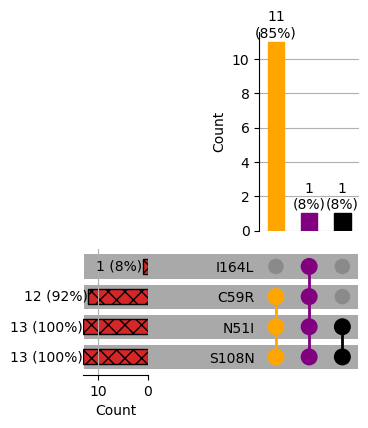

In [ ]:
gene = "dhfr" # <- Edit to plot the gene you are interested in
fig = upsetplot_fig(
    variants_df=bcf_df,
    ids_passed_QC=amp_uids_pass_QC_df,
    gene=gene,
    muts_dict=muts_dict,
)